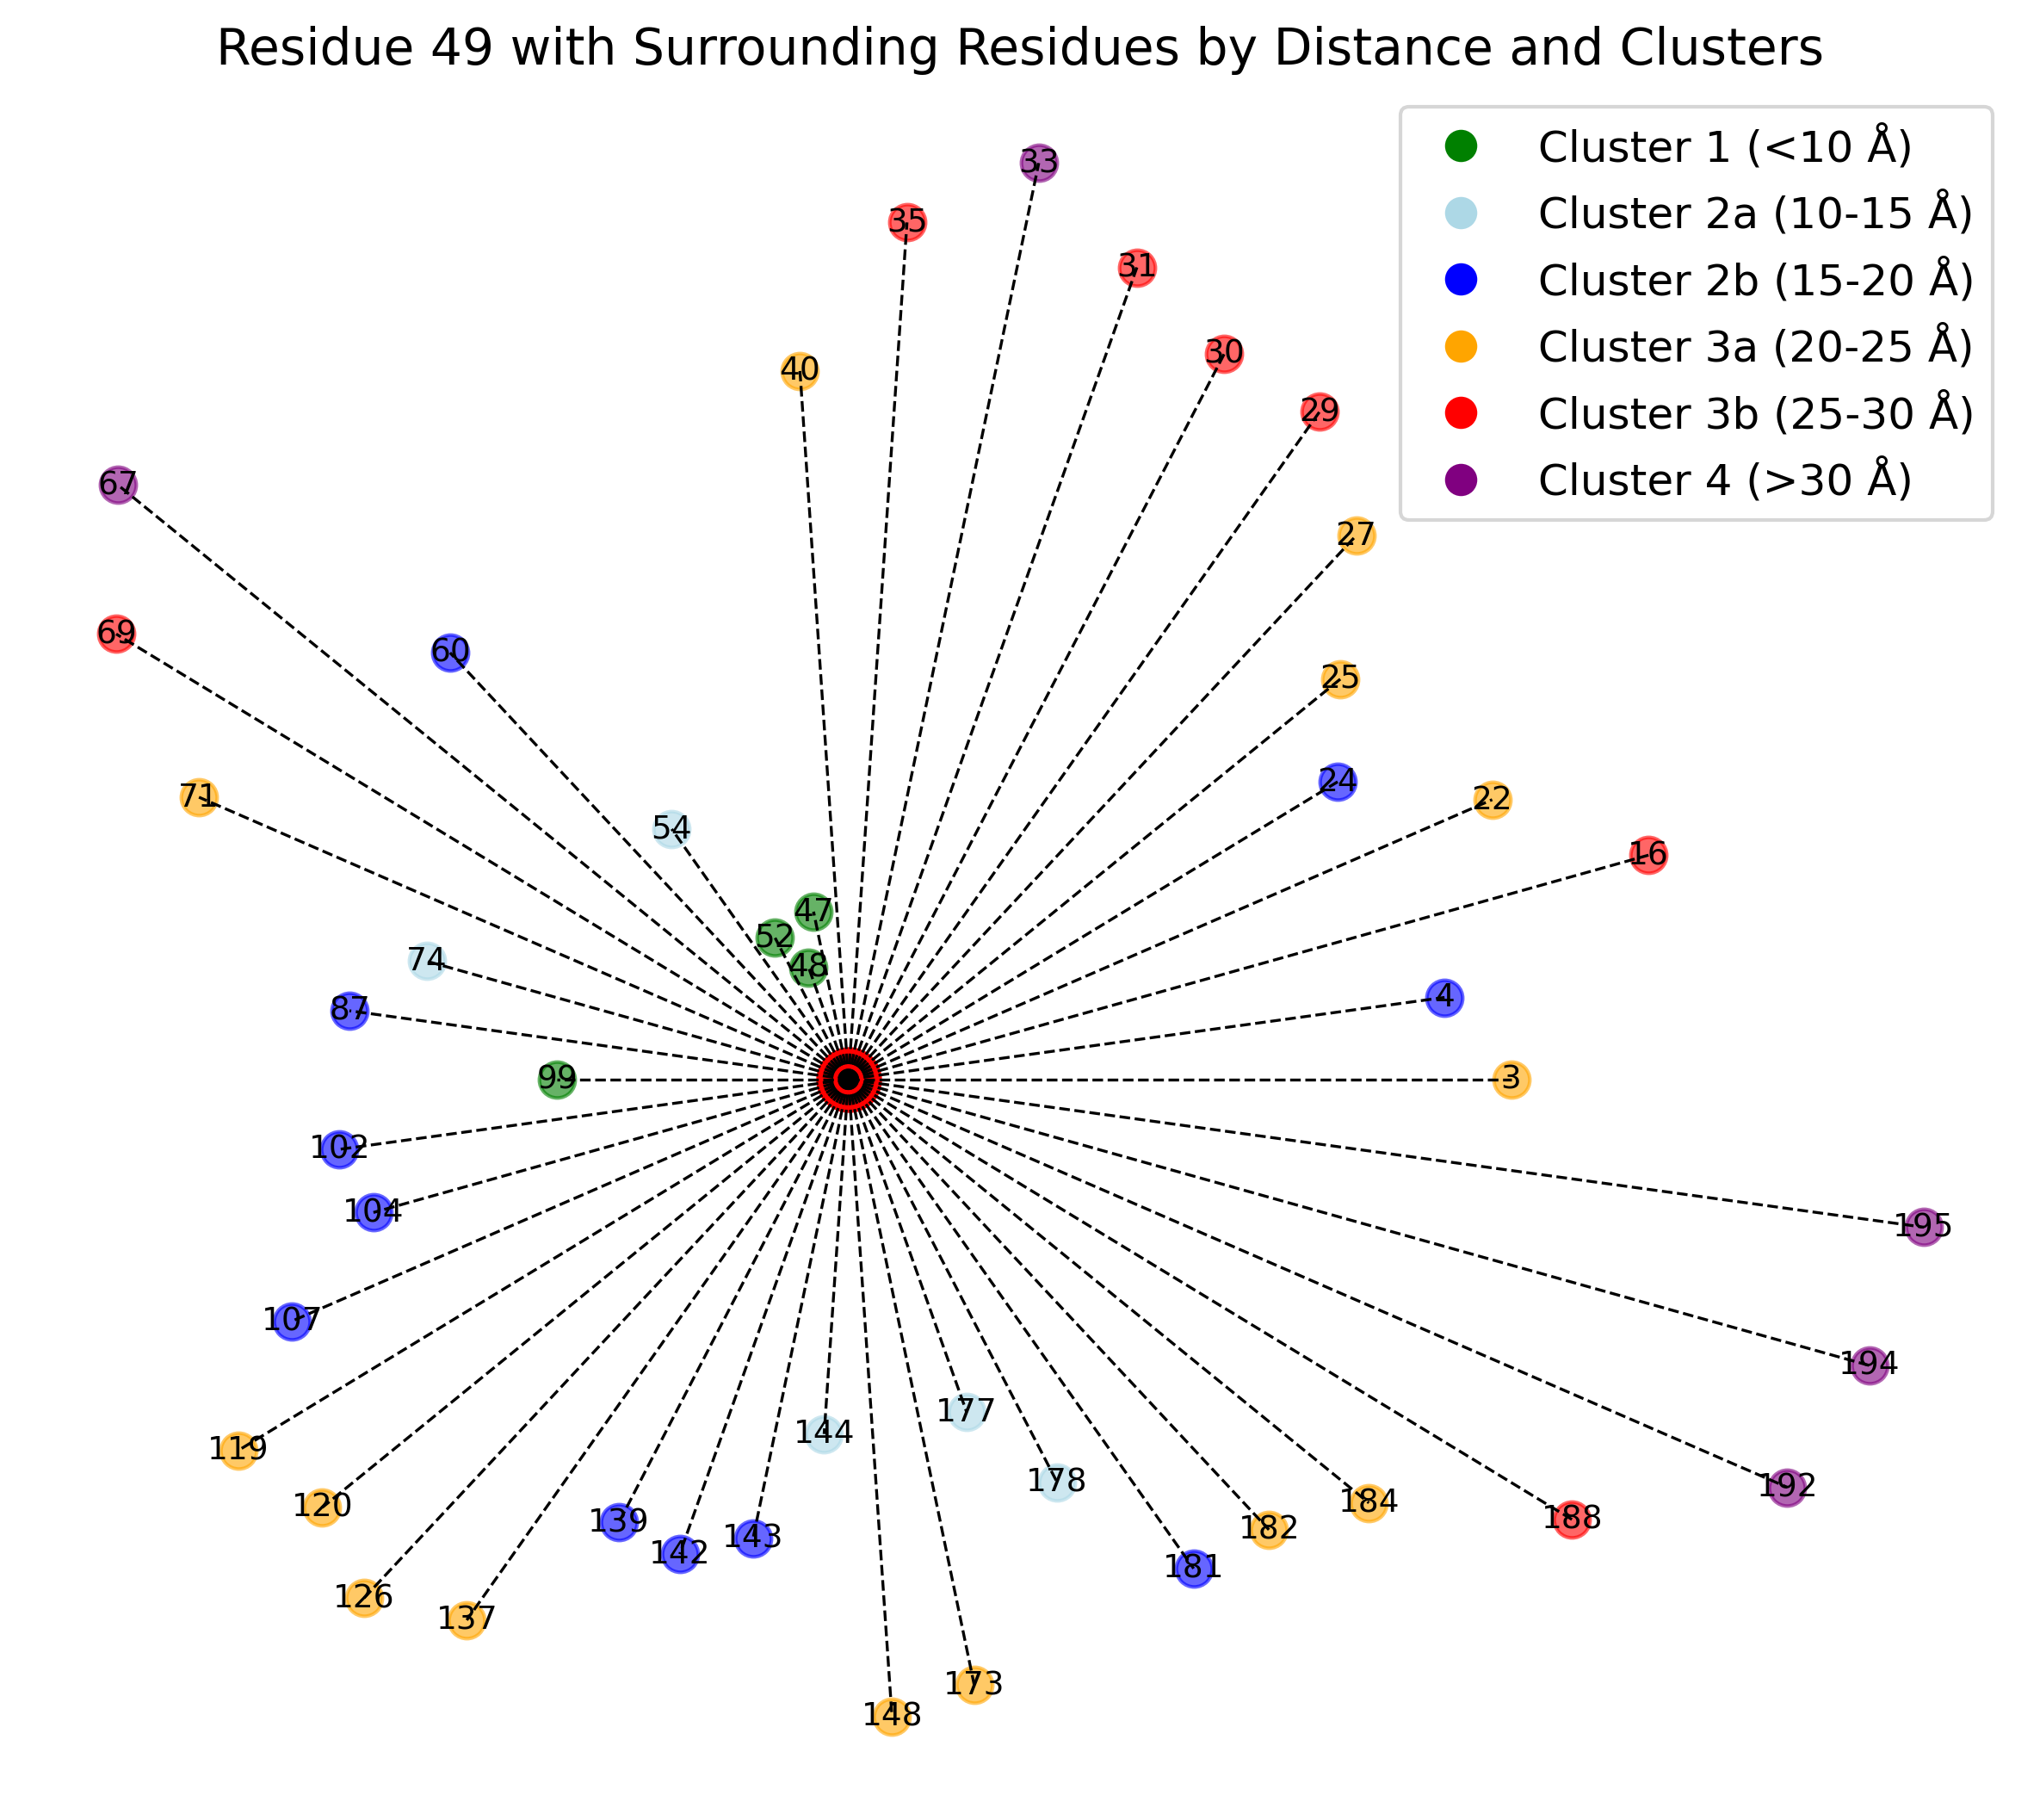

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Residue numbers and distances (Å) provided
residues = [
    (3, 21.63), (4, 19.64), (16, 27.12), (22, 22.91), (24, 18.69), 
    (25, 20.7), (27, 24.28), (29, 26.66), (30, 26.67), (31, 28.12),
    (33, 30.54), (35, 28.03), (40, 23.17), (47, 5.59), (48, 3.88),
    (52, 5.2), (54, 10.0), (60, 19.05), (67, 30.74), (69, 27.97),
    (71, 23.11), (74, 14.29), (87, 16.44), (99, 9.5), (102, 16.77),
    (104, 16.1), (107, 19.8), (119, 23.3), (120, 22.14), (126, 23.16),
    (137, 21.6), (139, 16.28), (142, 16.44), (143, 15.29), (144, 11.6),
    (148, 20.84), (173, 20.19), (177, 11.51), (178, 14.81), (181, 19.54),
    (182, 20.11), (184, 21.9), (188, 27.64), (192, 33.41), (194, 34.61),
    (195, 35.43)
]

# Extract residue numbers and distances into separate lists
residue_numbers, distances = zip(*residues)

# File path to the Free_Energy.tex file and save directory
file_path = '/home/hp/nayanika/github/GPX6/table/Free_Energy.tex'
save_path = '/home/hp/nayanika/github/GPX6/figures/Combined_Free_Energy_and_Residue_Distances.png'

# Regular expression to capture the data from the table, including errors
regex = re.compile(
    r'([A-Za-z0-9,\s\-]+) & ([0-9.]+)\s?\\pm\s?([0-9.]+) kcal/mol & ([0-9.\-]+)\s?\\pm\s?([0-9.]+) kcal/mol'
)

# Lists to store the extracted data
systems = []
dg_star_values = []
dg_star_errors = []
dg_zero_values = []
dg_zero_errors = []

# Read the .tex file and extract data for Mouse Cys and Mouse Sec only
with open(file_path, 'r') as f:
    for line in f:
        match = regex.search(line)
        if match:
            system_name = match.group(1).strip()
            if "Mouse Cys" in system_name or "Mouse Sec" in system_name:  # Filter entries
                systems.append(system_name)
                dg_star_values.append(float(match.group(2).strip()))
                dg_star_errors.append(float(match.group(3).strip()))
                dg_zero_values.append(float(match.group(4).strip()))
                dg_zero_errors.append(float(match.group(5).strip()))

# Ensure 'WT Mouse Cys' is found in the list
wt_mouse_cys_dg_star = None
for i, system in enumerate(systems):
    if "WT Mouse Cys" in system:
        wt_mouse_cys_dg_star = dg_star_values[i]
        break

if wt_mouse_cys_dg_star is None:
    raise ValueError("WT Mouse Cys dG* value not found in the table.")

# Threshold for low dG* values (set to WT Mouse Cys dG* value)
low_dg_star_threshold = wt_mouse_cys_dg_star

# Plotting the circular layout for residue distances
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)
fig, ax2 = plt.subplots(figsize=(8, 8), dpi=300)
ax2.set_aspect('equal')

# Plot residue 49 at the center (red circle)
ax2.scatter(0, 0, s=300, color='red', label='Residue 49')

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1', 'green'  # Cluster 1 (0-10 Å)
    elif 10 <= dist < 15:
        return 'Cluster 2a', 'lightblue'  # Cluster 2a (10-15 Å)
    elif 15 <= dist < 20:
        return 'Cluster 2b', 'blue'   # Cluster 2b (15-20 Å)
    elif 20 <= dist < 25:
        return 'Cluster 3a', 'orange'  # Cluster 3a (20-25 Å)
    elif 25 <= dist < 30:
        return 'Cluster 3b', 'red'  # Cluster 3b (25-30 Å)
    else:
        return 'Cluster 4', 'purple'  # Cluster 4 (30-35 Å)

# Plot surrounding residues based on distances and clusters
for i, (residue, dist) in enumerate(residues):
    # Get cluster information
    cluster_label, color = get_cluster(dist)
    
    # Calculate x and y coordinates based on angle and distance
    x = dist * np.cos(angles[i])
    y = dist * np.sin(angles[i])
    
    # Plot circles for residues with cluster colors
    ax2.scatter(x, y, s=100, color=color, label=cluster_label if i == 0 else "", alpha=0.6)
    
    # Annotate the residue numbers
    ax2.text(x, y, f"{residue}", fontsize=9, ha='center', va='center')
    
    # Draw a line from residue 49 (center) to each surrounding residue
    ax2.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.8)

# Add cluster legend
cluster_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 1 (<10 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Cluster 2a (10-15 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2b (15-20 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Cluster 3a (20-25 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 3b (25-30 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 4 (>30 Å)')
]
ax2.legend(handles=cluster_handles, loc='upper right', fontsize=12)

# Set title for the residue plot
ax2.set_title('Residue 49 with Surrounding Residues by Distance and Clusters', fontsize=14)

# Remove axes for better visualization
ax2.axis('off')

# Tight layout for saving
plt.tight_layout()

# Save the figure
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


In [ ]:
#x_labels = ["0-10 Å", "10-15 Å", "15-20 Å", "20-25 Å", "25-30 Å", "30-35 Å"]


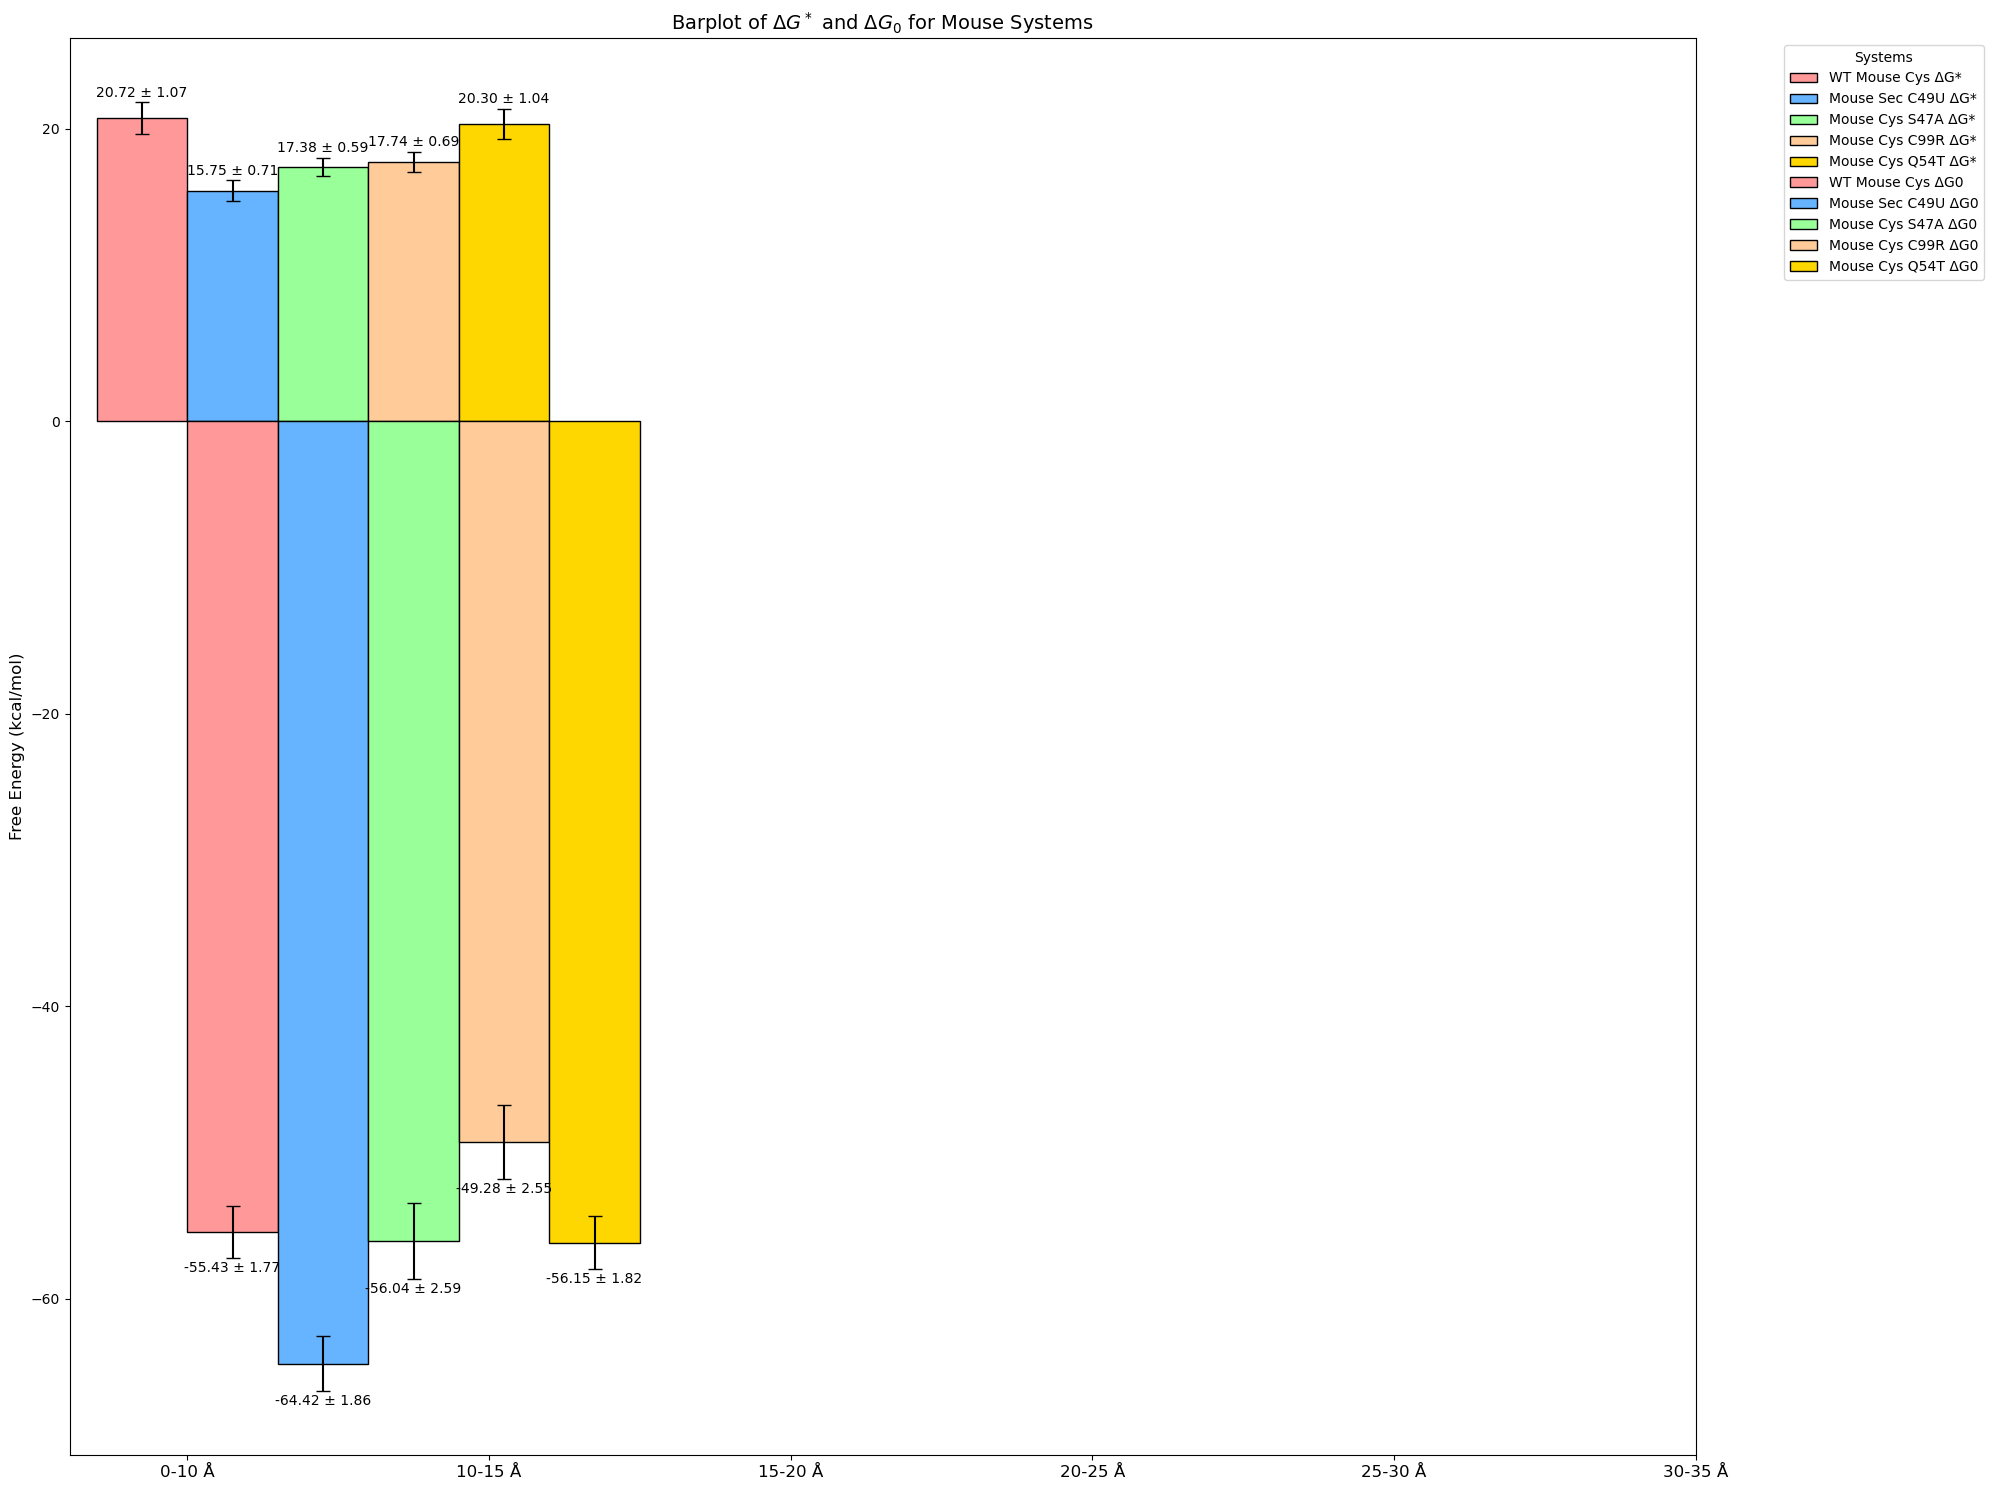

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Systems and their corresponding ΔG* and ΔG0 values and errors for 0-10 Å range
systems = ["WT Mouse Cys", "Mouse Sec C49U", "Mouse Cys S47A", "Mouse Cys C99R", "Mouse Cys Q54T"]
dg_star = [20.72, 15.75, 17.38, 17.74, 20.30]  # ΔG* values
dg_star_errors = [1.07, 0.71, 0.59, 0.69, 1.04]  # ΔG* errors

dg_0 = [-55.43, -64.42, -56.04, -49.28, -56.15]  # ΔG0 values
dg_0_errors = [1.77, 1.86, 2.59, 2.55, 1.82]  # ΔG0 errors

# Define colors for each system
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Different colors for each system

#Define the x-axis ranges
x_labels = ["0-10 Å", "10-15 Å", "15-20 Å", "20-25 Å", "25-30 Å", "30-35 Å"]
x = np.arange(len(x_labels))  # Position on x-axis

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Width of each bar
bar_width = 0.3  # Adjust for better spacing

# Plot bars for ΔG* values
for i, (system, value, error, color) in enumerate(zip(systems, dg_star, dg_star_errors, colors)):
    ax.bar(x[0] + i * bar_width - bar_width / 2, value, bar_width, 
           yerr=error, label=f'{system} ΔG*', capsize=5, 
           color=color, edgecolor='black')

    # Annotate the bar with the value of ΔG* and the error
    ax.text(
        x[0] + i * bar_width - bar_width / 2, 
        value + error + 0.2, 
        f'{value:.2f} ± {error:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Plot bars for ΔG0 values
for i, (system, value, error, color) in enumerate(zip(systems, dg_0, dg_0_errors, colors)):
    ax.bar(x[0] + i * bar_width + bar_width / 2, value, bar_width, 
           yerr=error, label=f'{system} ΔG0', capsize=5, 
           color=color, edgecolor='black')

    # Annotate the bar with the value of ΔG0 and the error
    ax.text(
        x[0] + i * bar_width + bar_width / 2, 
        value - error - 0.2, 
        f'{value:.2f} ± {error:.2f}', 
        ha='center', 
        va='top', 
        fontsize=10, 
        color='black'
    )

# Set x-axis labels and title
ax.set_xticks(x)  # No need to shift for tick labels
ax.set_xticklabels(x_labels, fontsize=12)
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=12)
ax.set_title('Barplot of $\Delta G^*$ and $\Delta G_0$ for Mouse Systems', fontsize=14)

# Display legend
ax.legend(title='Systems', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


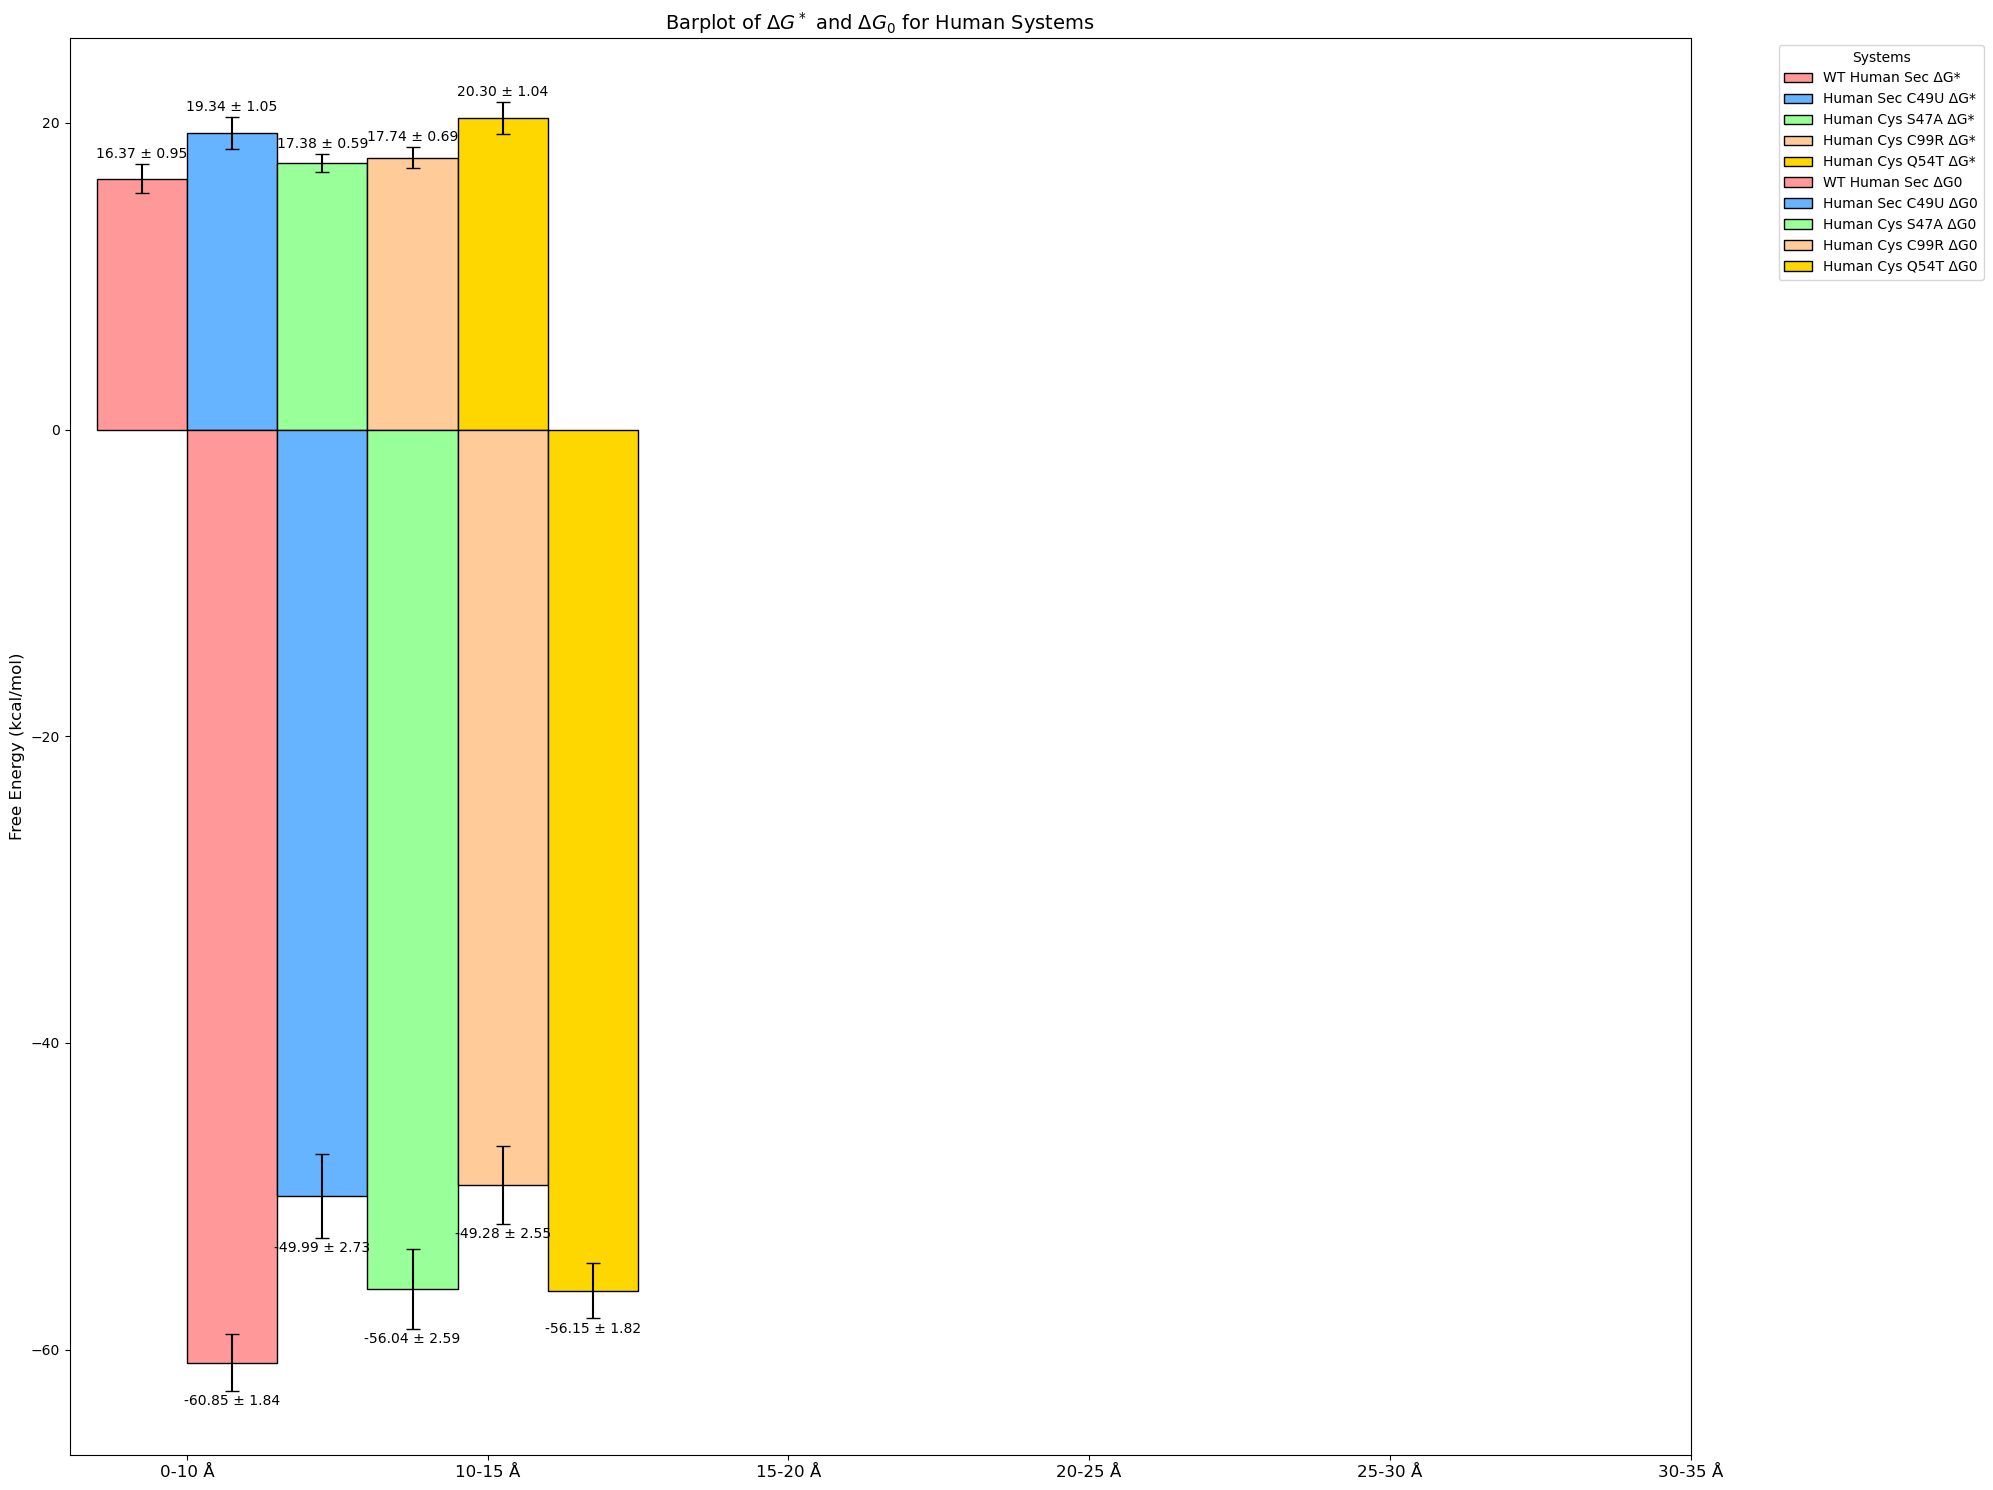

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Systems and their corresponding ΔG* and ΔG0 values and errors for 0-10 Å range
systems = ["WT Human Sec", "Human Sec C49U", "Human Cys S47A", "Human Cys C99R", "Human Cys Q54T"]
dg_star = [16.37, 19.34, 17.38, 17.74, 20.30]  # ΔG* values (replace with actual human values)
dg_star_errors = [0.95, 1.05, 0.59, 0.69, 1.04]  # ΔG* errors (replace with actual human errors)

dg_0 = [-60.85, -49.99, -56.04, -49.28, -56.15]  # ΔG0 values (replace with actual human values)
dg_0_errors = [1.84, 2.73, 2.59, 2.55, 1.82]  # ΔG0 errors (replace with actual human errors)

# Define colors for each system
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Different colors for each system

# Define the x-axis ranges
x_labels = ["0-10 Å", "10-15 Å", "15-20 Å", "20-25 Å", "25-30 Å", "30-35 Å"]
x = np.arange(len(x_labels))  # Position on x-axis

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Width of each bar
bar_width = 0.3  # Adjust for better spacing

# Plot bars for ΔG* values
for i, (system, value, error, color) in enumerate(zip(systems, dg_star, dg_star_errors, colors)):
    ax.bar(x[0] + i * bar_width - bar_width / 2, value, bar_width, 
           yerr=error, label=f'{system} ΔG*', capsize=5, 
           color=color, edgecolor='black')

    # Annotate the bar with the value of ΔG* and the error
    ax.text(
        x[0] + i * bar_width - bar_width / 2, 
        value + error + 0.2, 
        f'{value:.2f} ± {error:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

# Plot bars for ΔG0 values
for i, (system, value, error, color) in enumerate(zip(systems, dg_0, dg_0_errors, colors)):
    ax.bar(x[0] + i * bar_width + bar_width / 2, value, bar_width, 
           yerr=error, label=f'{system} ΔG0', capsize=5, 
           color=color, edgecolor='black')

    # Annotate the bar with the value of ΔG0 and the error
    ax.text(
        x[0] + i * bar_width + bar_width / 2, 
        value - error - 0.2, 
        f'{value:.2f} ± {error:.2f}', 
        ha='center', 
        va='top', 
        fontsize=10, 
        color='black'
    )

# Set x-axis labels and title
ax.set_xticks(x)  # No need to shift for tick labels
ax.set_xticklabels(x_labels, fontsize=12)
ax.set_ylabel('Free Energy (kcal/mol)', fontsize=12)
ax.set_title('Barplot of $\Delta G^*$ and $\Delta G_0$ for Human Systems', fontsize=14)

# Display legend
ax.legend(title='Systems', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()
